#### clustering of embeddings with HDBSCAN using t-SNE for dimensionality reduction + visualization 

In [2]:
import pickle, ast, re
import numpy as np
import seaborn as sns
import hdbscan
from sklearn.manifold import TSNE
from adjustText import adjust_text
import matplotlib.pyplot as plt
%matplotlib inline

/home/rrichajalota/work/DBpedia Chatlog Analysis/venv/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/rrichajalota/work/DBpedia Chatlog Analysis/venv/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
with open('../data/vb_obj_ftext_ner.pkl', 'rb') as f: #  data/vb_obj_ftext_unans_ner.pkl
    vo_rep = pickle.load(f)

vec = []
label = []
with open('../data/vb_obj_ner_ftextLabels.pkl', 'rb') as f: # data/vb_obj_ner_ftextLabels.pkl data/vb_obj_ner_unans_ftextLabels.pkl
    vec_lab = pickle.load(f) # lab_vec_map[str(doc.vector)] = doc.text

for vc in vo_rep:
    if str(vc) in vec_lab:
        vec.append(vc)
        label.append(vec_lab[str(vc)])
    
# with open('../data/NER_multi_sent_emb.pkl', 'rb') as f: # {text1 : text_vector1, text2: text_vec2, ..} data/sent_emb.pkl data/unans_sent_emb.pkl
#     sent_dict = pickle.load(f)
#     sentv = []
#     label = []
#     for k,v in sent_dict.items():
#         sentv.append(v)
#         label.append(k)

from sklearn.decomposition import PCA
X = PCA(n_components=50).fit_transform(vec)
# sX = PCA(n_components=50).fit_transform(sentv)

from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
# sX = StandardScaler().fit_transform(sX)


In [4]:
print(len(label))

6425


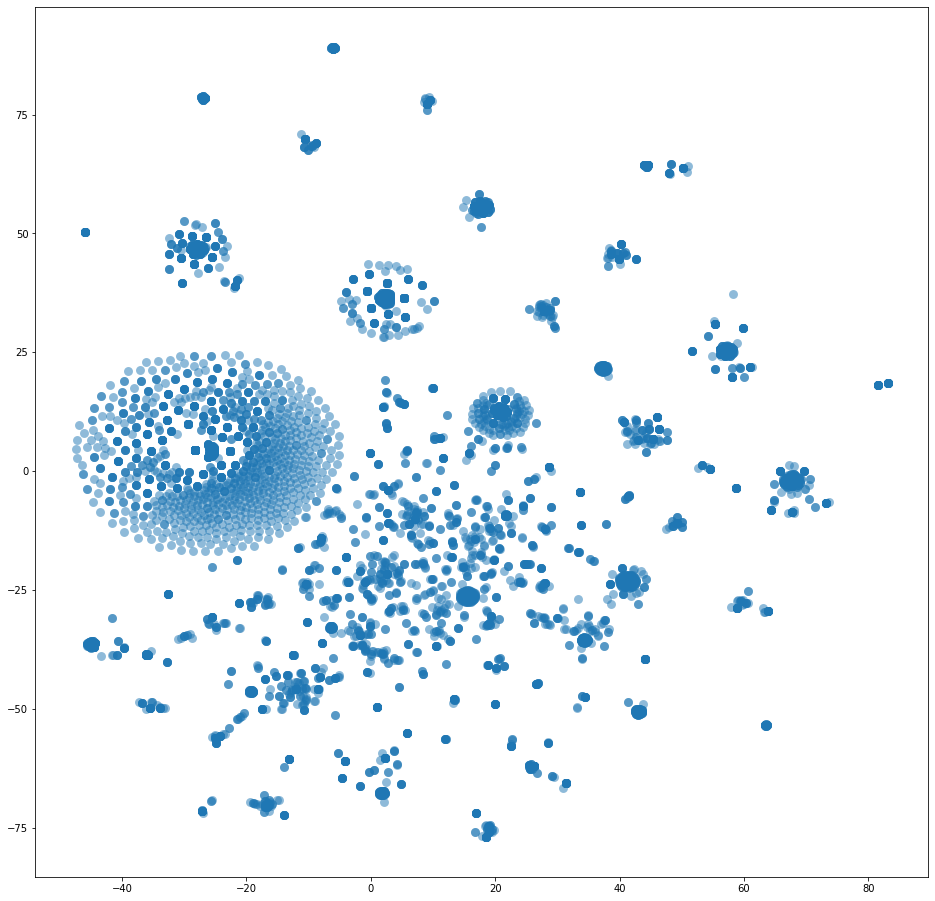

In [5]:
# 2D projection using TSNE (TODO: experiment with UMAP)
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}
# projection = TSNE().fit_transform(sX)
projection = TSNE().fit_transform(X)
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, **plot_kwds)

59
59


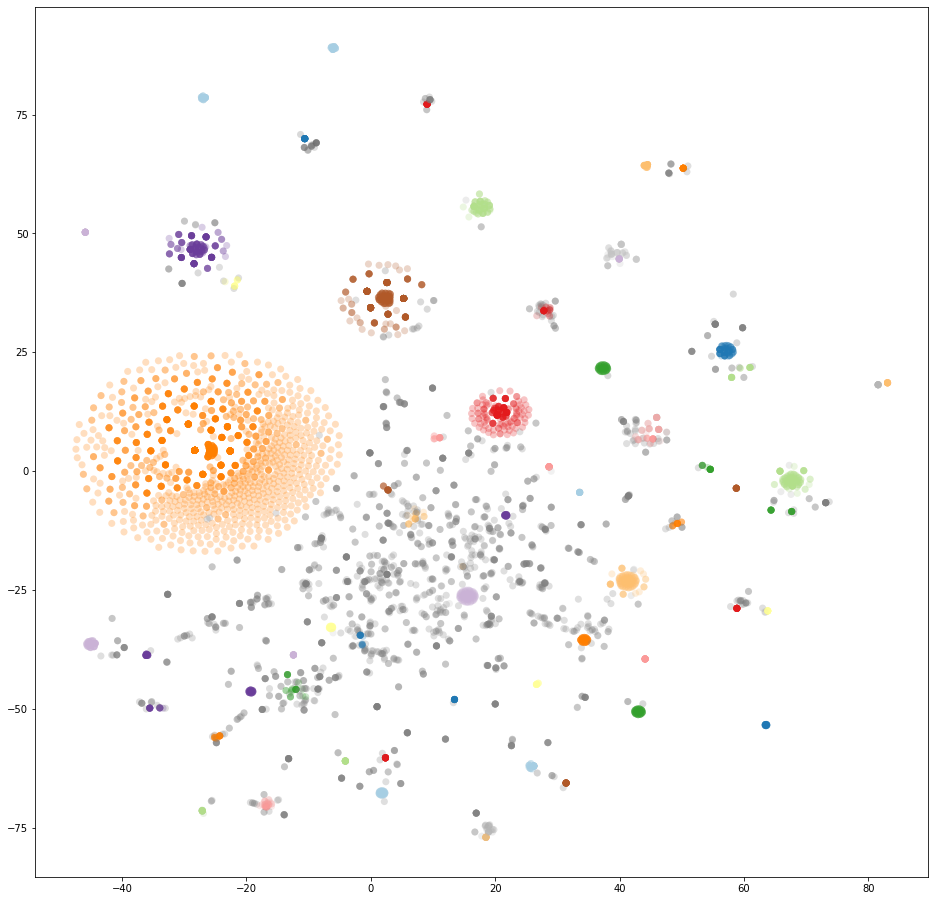

In [6]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(X)
print(len(set(clusterer.labels_)))
color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
print(len(color_palette))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

29


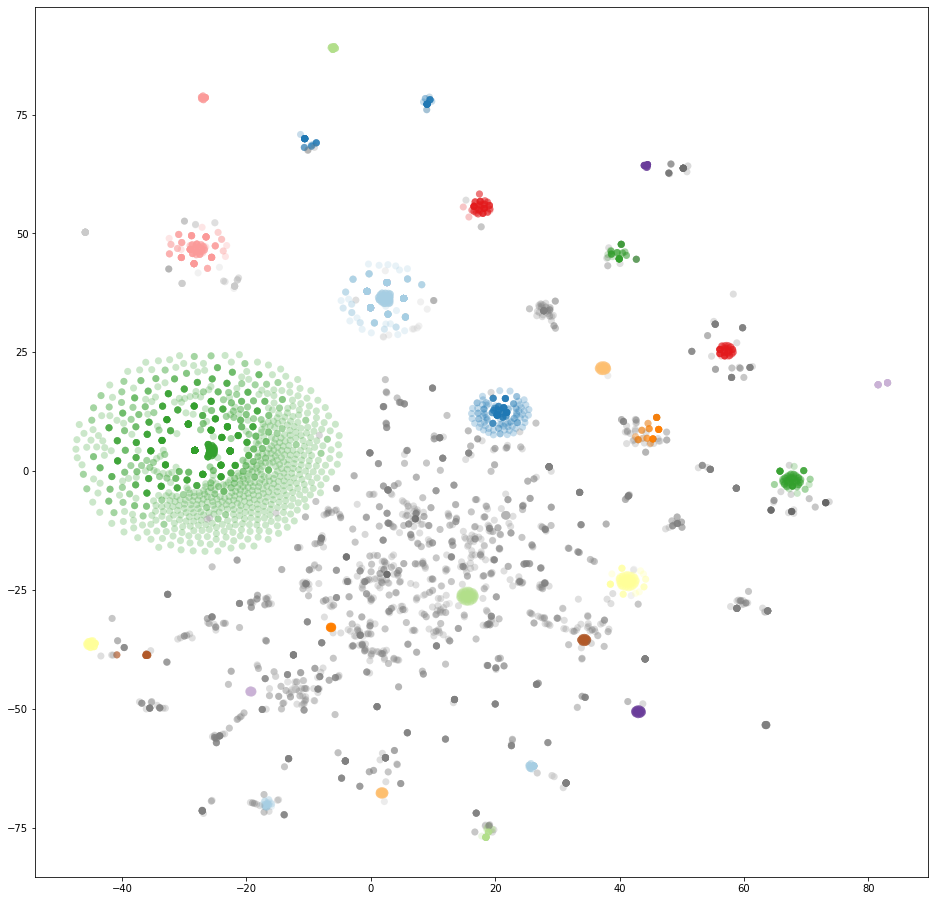

In [7]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(X)
print(len(set(clusterer.labels_)))
color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

13


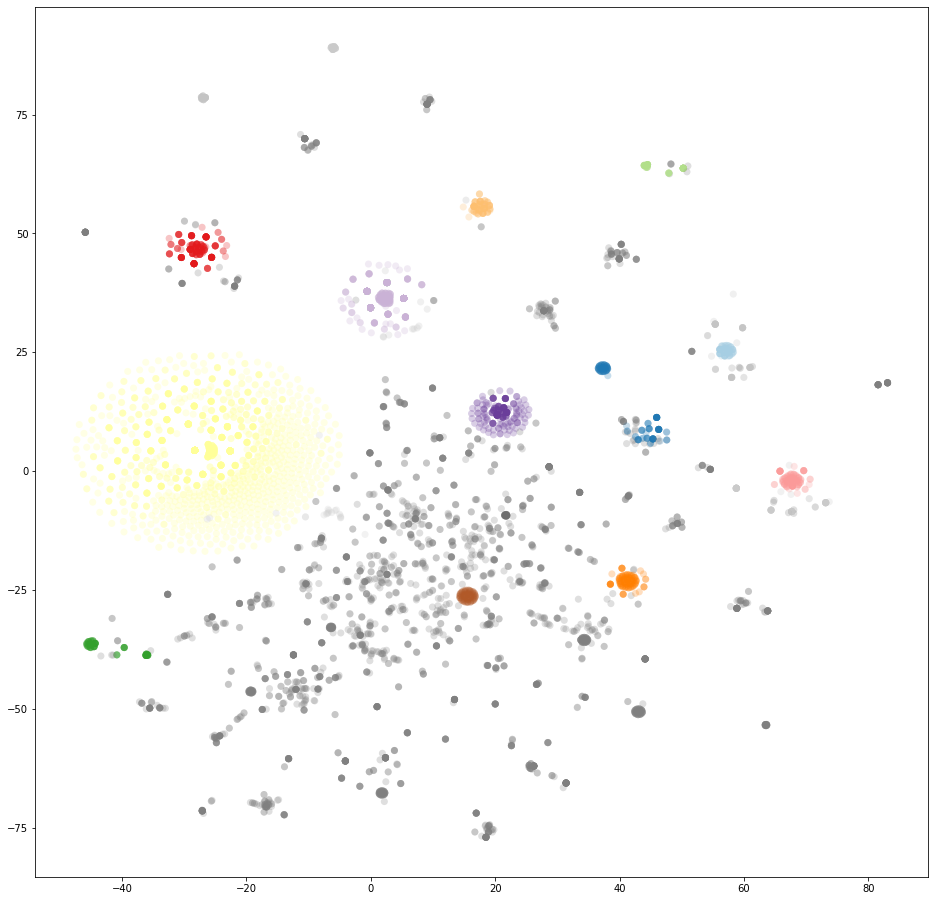

In [8]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(X)
print(len(set(clusterer.labels_)))
color_palette = sns.color_palette('Paired',len(set(clusterer.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [9]:
# get top k clusters with top terms  
# label = lab 
def get_top_clusters(clusterer, k):
    from collections import defaultdict
    from operator import itemgetter

    top_terms = defaultdict(list)
    
    for lab, prob, text_lab in zip(clusterer.labels_, clusterer.probabilities_, label):
        top_terms[lab].append((prob, text_lab))

    for x in top_terms:
        top_terms[x].sort(reverse=True, key=itemgetter(0)) # sort the pair based on probability 
#         print(x, len(top_terms[x]))

    top10_labels = sorted(top_terms, key=lambda k: len(top_terms[k]), reverse=True)
    print(top10_labels)
    topklab = set(top10_labels[:k]) # a set of top 10 cluster labels with label -1 (for noise)

    for el in top_terms:
        if el in topklab:
            print(el, top_terms[el][:10])
            
    return top_terms, top10_labels, topklab # {lab1: (prob, [term1, term2,..]), }, {denseClusterLabel1,..}
        
# get_top_clusters(clusterer, 11)

35
[20.991425   -6.8748927  -5.5329747  ... -7.946762   -0.14962749
 -8.273532  ] [ -7.8949623  -8.025333   -8.17485   ... -14.178707    3.824797
 -45.779686 ]
[-1, 31, 28, 17, 30, 15, 6, 22, 20, 32, 25, 18, 8, 3, 27, 7, 10, 21, 23, 16, 2, 5, 1, 14, 12, 26, 9, 11, 0, 24, 33, 13, 19, 4, 29]
-1 [(0.0, 'who church'), (0.0, 'swife？ who'), (0.0, 'directed creativework'), (0.0, 'birthdate person'), (0.0, 'name cat'), (0.0, 'learn county'), (0.0, 'mountain who'), (0.0, 'city germany'), (0.0, 'place lithuania'), (0.0, 'has members')]
31 [(1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who'), (1.0, 'person who')]
28 [(1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city'), (1.0, 'get city')]
15 [(1.0, 'learn person'), (1.0, 'learn person'), (1.0, 'lea

/home/rrichajalota/work/DBpedia Chatlog Analysis/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/rrichajalota/work/DBpedia Chatlog Analysis/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65311 missing from current font.
  font.set_text(s, 0, flags=flags)


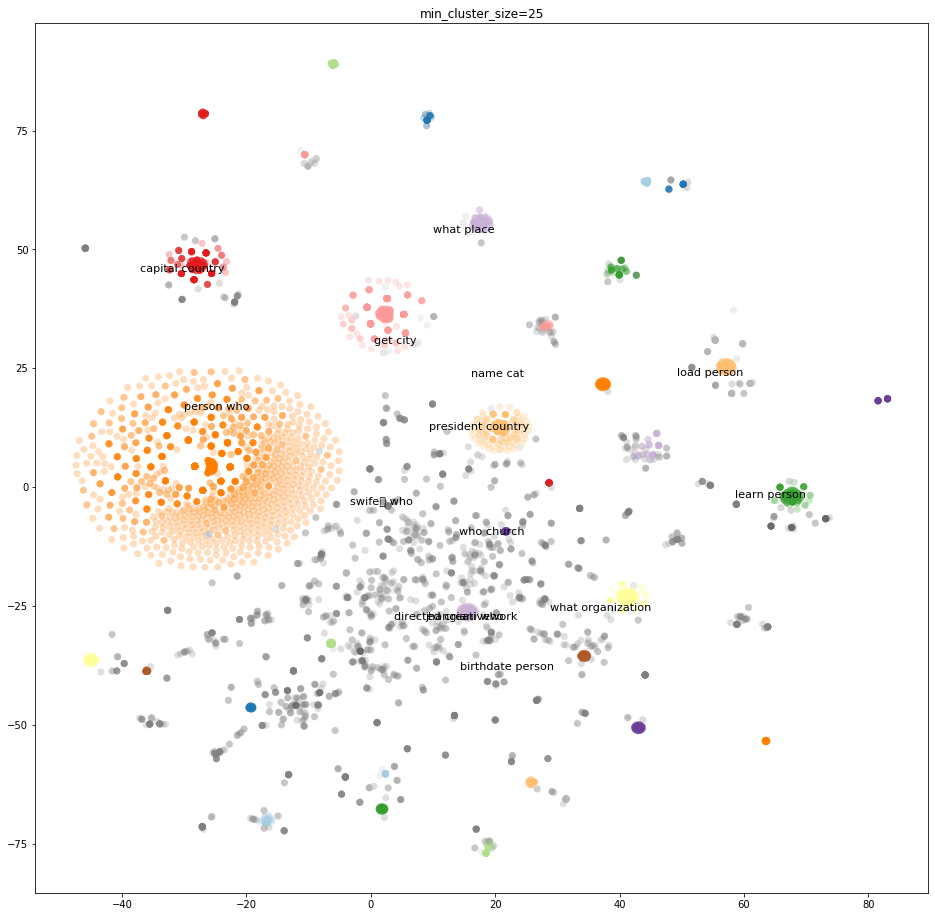

In [13]:
from collections import Counter
from collections import defaultdict
clusterer = hdbscan.HDBSCAN(min_cluster_size=25).fit(X)
print(len(set(clusterer.labels_)))


x, y = projection.T
print(x, y)

color_palette = sns.color_palette('Paired', len(set(clusterer.labels_)))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.figure(figsize=(16, 16))
plt.title('min_cluster_size=25')

plot_top=defaultdict(set)
plot_point = defaultdict(list)

# label 10 dense clusters with top 5 terms
top_terms, top10_labels, topklab = get_top_clusters(clusterer,10)
texts = []

# print(top_terms, topklab)
#for less dense plots, plot only 2 labels
num_plotlab = {}
for i,lab in enumerate(top10_labels):
    if i < 3:
        num_plotlab[lab] = 5
        continue
    elif i < 5:
        num_plotlab[lab] = 5
    else:
        num_plotlab[lab] = 5

for i, l, p in zip(range(len(clusterer.labels_)),clusterer.labels_, clusterer.probabilities_): # pointwise iteration
    if l in topklab and len(plot_top[l]) < num_plotlab[l]:
#         print(plot_top[l])
        d = 0.1
        for el in top_terms[l][:50]:
            if p == el[0]:
                if len(el[1]) < 30 and el[1] not in plot_top[l]:
                    print(l, plot_top[l])
                    plot_top[l].add(el[1])
                    offset = len(plot_top[l])
#                     if offset > 3:
#                         offset -= 2
                    if offset % 2:
                        offset = -1.6 * offset
                    if abs(y[i])+abs(offset) > abs(y[i]) + 2:
                        offset -= 0.96
                    new_cord = (x[i]+offset,y[i]+offset)
                    for cord in plot_point[l]:
                        if cord[1] - 2.8 < new_cord[1] < cord[1] + 2.8:
#                             if l == -1:
#                                 new_cord = (new_cord[0]+0.1, new_cord[1] + abs(abs(cord[1]) - abs(new_cord[1])))
#                             else:
                            new_cord = (new_cord[0], new_cord[1] + abs(abs(cord[1]) - abs(new_cord[1])))
                            print('yes!!',el[1])
                    plt.annotate(el[1], new_cord, horizontalalignment='center', verticalalignment='center', size=11.25)
                    
                    plot_point[l].append((new_cord[0],new_cord[1], el[1]))
                    break
        
print(plot_point)
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

plt.savefig('../data/vbObj-varylabel-25clus.png')

In [151]:
for k,v in top_terms.items():
    print(f'top 5 terms in cluster {k}: {v[:5]}')

top 5 terms in cluster -1: [(0.0, 'Who is Person Church ?'), (0.0, 'get location City'), (0.0, 'DBPEDIA Event'), (0.0, 'What is the Language name of a cat'), (0.0, 'who is Person?')]
top 5 terms in cluster 28: [(1.0, 'What is the temperature in Place ?'), (1.0, 'what is the capital of Country?'), (1.0, 'Who is the prime minister of Country?'), (1.0, 'Give me the capital of Country?\\'), (1.0, 'how high is Mountain ')]
top 5 terms in cluster 18: [(1.0, 'Where is the City Tower?'), (1.0, 'where is the Place?'), (1.0, 'how old is Person'), (1.0, 'learn more Person Home Person Home'), (1.0, 'load similar Country Country')]
top 5 terms in cluster 8: [(1.0, 'what is the Organization'), (1.0, 'How old ist Person'), (1.0, 'How can I go from Place to Basel'), (1.0, 'What is the cryptocurrency called CreativeWork?'), (1.0, 'tell me what you know about City')]
top 5 terms in cluster 11: [(1.0, 'how old Person is?'), (1.0, 'Who is the president of the Country?'), (1.0, 'who is MusicGroup'), (1.0, 

In [148]:
print(len(set(clusterer.labels_)))


33


In [18]:
print(topklab)

{9, 10, 13, 15, 18, 24, 27, 28, 29, -1}
